In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import math
import numpy as np

from pykern.pkcollections import PKDict

import rslaser.rspulse
import rslaser.rspulse.pulse as rsp
import rslaser.rspulse.gauss_hermite as rsgh

In [3]:
# get some physical and mathematical constants ready to go
# this code snippet is adapted from rsbeams.rsphysics.rsconst.py
import math
import scipy.constants as const

TWO_PI = 2 * math.pi
RT_TWO_PI = math.sqrt(2*math.pi)
RT_2_OVER_PI = math.sqrt(2/math.pi)

c_SQ = const.c**2
c_INV  = 1./const.c
MKS_factor = 1./(4.*math.pi*const.epsilon_0)
m_e_EV = const.m_e * c_SQ / (-const.e)

In [4]:
# dimensionless laser pulse amplitude
# a_0 = 0.85e-9 * lambda [microns] * Sqrt(Intensity [W/cm^2])
# a_0 < 1 is low-amplitude, resulting in nonrelativistic plasma electron dynamics
# a_0 > 1 is high-amplitude, resulting in relativistic plasma electron dynamics
a_0 = 2.1

# central laser wavelength [m]
lambda_0 = 8.e-6
k_0 = 1. / lambda_0
f_0 = k_0 * const.c
omega_0 = TWO_PI * f_0

# Peak electric field [V/m]
efield_0 = a_0 * const.m_e * omega_0 * const.c / (const.e)
print('efield_0 = ', efield_0*1.e-9, ' [GV/m]')

# FWHM pulse length
tau_fwhm_ns = 200.   # FWHM laser pulse length [ns]
tau_fwhm = tau_fwhm_ns * 1.e-9
L_fwhm = tau_fwhm * const.c

# waist size and its longitudinal location
w_0_microns = 100.
w_0 = w_0_microns * 1.e-6
z_waist = 0.1
z_center = 0.0

efield_0 =  842.8090373325251  [GV/m]


In [5]:
# create a dictionary of all relevant physical and numerical quantities
data_in=PKDict()

data_in.a_0 = a_0
data_in.w_0 = w_0
data_in.z_waist = z_waist
data_in.z_center = z_center
data_in.lambda_0 = lambda_0
data_in.tau_fwhm = tau_fwhm

#create laser pulse
laser_env = rsp.LaserPulseEnvelope(data_in)

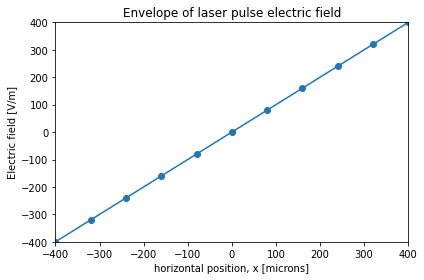

In [6]:
# Plot a transverse lineout of the electric field
n_points = 11
x_vals = np.zeros(n_points)
E_vals = np.zeros(n_points)

x_max = 4. * laser_env._w_0*1.e6
x_min = -x_max
del_x = (x_max - x_min) / (n_points-1)
for ind in range(n_points):
    x_vals[ind] = x_min + ind*del_x
#    E_vals[ind] = laser_env.E_field(x_vals[ind], 0., 0.)
    E_vals[ind] = x_vals[ind]
#    print("x_vals(", ind, ") = ", x_vals[ind])

fig = plt.figure()
ax = fig.gca()

ax.scatter(x_vals, E_vals)
ax.plot(x_vals, E_vals)
ax.set_xlabel('horizontal position, x [microns]')
ax.set_ylabel('Electric field [V/m]')
ax.set_xlim([x_min, x_max])
ax.set_ylim([np.min(E_vals), np.max(E_vals)])
ax.set_title(r'Envelope of laser pulse electric field')
        
plt.tight_layout()

In [7]:
# let's try again with a generalized GaussHermite envelope
# create a dictionary of all relevant physical and numerical quantities
data_in=PKDict()

data_in.a0 = a_0
data_in.w0 = w_0
data_in.lambda0 = lambda_0
data_in.tau_fwhm = tau_fwhm

#create laser pulse
gh_env = rsgh.GaussHermite(data_in)